In [61]:
%load_ext autoreload
%autoreload 2

import mypkg.tvblp as tvblp   # module import (not "from … import …")


import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
df = pd.read_csv('data_yoghurt.csv')


# Normalize attributes by weight
df['calories'] = df['calories'] / df['weight']
df['sugar'] = df['sugar'] / df['weight']
df['protein'] = df['protein'] / df['weight']

# Compute outside good share
df = df.join(pd.DataFrame(1 - df.groupby(by=['city', 'month']).share.sum()).rename(columns={'share': 'og_share'}), on=['city', 'month'])

#Add intercept
df['const'] = 1

# Prepare y and X
y = np.log(df.share).values - np.log(df.og_share).values
X = df[['const', 'price', 'weight', 'calories', 'sugar', 'protein']].values



df['sugar_dev'] = df.sugar - df[(df.month==1)&(df.city==1)].sugar.mean()
df['market'] = 'C'+(df.city).astype(str)+'M'+(df.month).astype(str)
df = df.join(df.groupby(by = 'market').sugar.sum().rename('instrument_2'), on = 'market')
df['instrument_1'] = df['diesel']*df['distance']

prod = df['product'].copy()  # stash original
df = pd.get_dummies(
    df,
    columns=['city', 'month', 'product'],
    prefix=['city', 'month', 'product'],
    drop_first=True
)
df.insert(0, 'product', prod)  # re-add original (position 0 optional)

lin_columns = df.columns.drop(['share', 'weight', 'calories', 'sugar', 'protein', 'og_share', 'instrument_1', 'distance', 'diesel', 'sugar_dev', 'market', 'instrument_2', 'product'])
random_columns = ['sugar_dev']

In [63]:
model = tvblp.TwoStepGMM_BLP(df, share_col='share', price_col='price',
lin = lin_columns, random = random_columns,
instruments = ['instrument_1', 'instrument_2'], market_id='market',
product_id='product', integration_points=50, integration_int = [0.1, 0.9], og_share_col='og_share')

Initialized BLP with 27584 observations across 7192 markets.
Linear characteristics: ['price', 'const', 'city_2', 'city_3', 'city_4', 'city_5', 'city_6', 'city_7', 'city_8', 'city_9', 'city_10', 'city_11', 'city_12', 'city_13', 'city_14', 'city_15', 'city_16', 'city_17', 'city_18', 'city_19', 'city_20', 'city_21', 'city_22', 'city_23', 'city_24', 'city_25', 'city_26', 'city_27', 'city_28', 'city_29', 'city_30', 'city_31', 'city_32', 'city_33', 'city_34', 'city_35', 'city_36', 'city_37', 'city_38', 'city_39', 'city_40', 'city_41', 'city_42', 'city_43', 'city_44', 'city_45', 'city_46', 'city_47', 'city_48', 'city_49', 'city_50', 'city_51', 'city_52', 'city_53', 'city_54', 'city_55', 'city_56', 'city_57', 'city_58', 'city_59', 'city_60', 'city_61', 'city_62', 'city_63', 'city_64', 'city_65', 'city_66', 'city_67', 'city_68', 'city_69', 'city_70', 'city_71', 'city_72', 'city_73', 'city_74', 'city_75', 'city_76', 'city_77', 'city_78', 'city_79', 'city_80', 'city_81', 'city_82', 'city_83', 'c

In [64]:
L = [[10]]
W = inv(model.Z.T@model.Z)

obj = []
grd = []

for sigma in range(-200,201,10):
    print(sigma)
    L = [[sigma]]
    obj.append(model.G_objective(L, W))
    grd.append(model.grad_L(L, W)[0][0])

-200


ValueError: Size of label 'i' for operand 1 (50) does not match previous terms (2).

<Axes: >

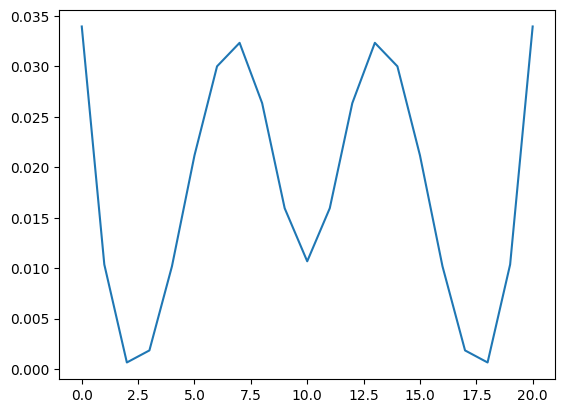

In [ ]:
pd.Series(obj).plot()

<Axes: >

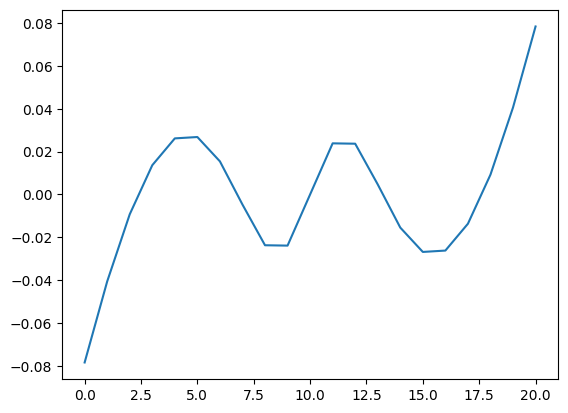

In [ ]:
pd.Series(grd).plot()